<!--NAVIGATION-->
< [简单的散点图](04.02-Simple-Scatter-Plots.ipynb) | [目录](Index.ipynb) | [密度和轮廓图](04.04-Density-and-Contour-Plots.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.03-Errorbars.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Visualizing Errors

# 误差可视化

> For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

对于任何的科学测量来说，精确计算误差与精确报告测量值基本上同等重要，如果不是更加重要的话。例如，设想我正在使用一些天文物理学观测值来估算哈勃常数，即本地观测的宇宙膨胀系数。我从一些文献中知道这个值大概是71 (km/s)/Mpc，而我测量得到的值是74 (km/s)/Mpc,。这两个值是否一致？在仅给定这些数据的情况下，这个问题的答案是，无法回答。

译者注：Mpc（百万秒差距）参见[秒差距](https://zh.wikipedia.org/wiki/%E7%A7%92%E5%B7%AE%E8%B7%9D)

> Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71 $\pm$ 2.5 (km/s)/Mpc, and my method has measured a value of 74 $\pm$ 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

如果我们将信息增加一些，给出不确定性：最新的文献表示哈勃常数的值大约是71 $\pm$ 2.5 (km/s)/Mpc，我的测量值是74 $\pm$ 5 (km/s)/Mpc。这两个值是一致的吗？这就是一个可以准确回答的问题了。

> In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

在数据和结果的可视化中，有效地展示这些误差能使你的图表涵盖和提供更加完整的信息。

## Basic Errorbars

## 基础误差条

> A basic errorbar can be created with a single Matplotlib function call:

调用一个Matplotlib函数就能创建一个基础的误差条：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

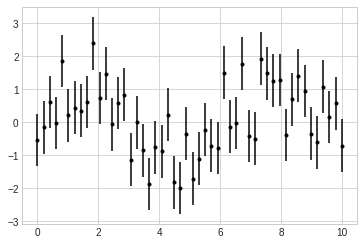

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

> Here the ``fmt`` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ``plt.plot``, outlined in [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb).

这里的`fmt`参数是用来控制线条和点风格的代码，与`plt.plot`有着相同的语法，参见[简单的折线图](04.01-Simple-Line-Plots.ipynb)和[简单的散点图](04.02-Simple-Scatter-Plots.ipynb)。

> In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

除了上面的基本参数，`errorbar`函数还有很多参数可以用来精细调节图表输出。使用这些参数你可以很容易的个性化调整误差条的样式。作者发现通常将误差线条颜色调整为浅色会更加清晰，特别是在数据点比较密集的情况下：

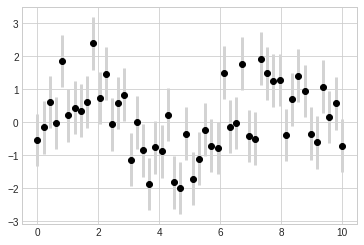

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

> In addition to these options, you can also specify horizontal errorbars (``xerr``), one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of ``plt.errorbar``.

除了上面介绍的参数，你还可以指定水平方向的误差条（`xerr`），单边误差条和其他很多的参数。参阅`plt.errorbar`的帮助文档获得更多信息。

## Continuous Errors

## 连续误差

> In some situations it is desirable to show errorbars on continuous quantities.
Though Matplotlib does not have a built-in convenience routine for this type of application, it's relatively easy to combine primitives like ``plt.plot`` and ``plt.fill_between`` for a useful result.

在某些情况下可能需要对连续值展示误差条。虽然Matplotlib没有內建的函数能直接完成这个任务，但是你可以通过简单将`plt.plot`和`plt.fill_between`函数结合起来达到目标。

> Here we'll perform a simple *Gaussian process regression*, using the Scikit-Learn API (see [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb) for details).
This is a method of fitting a very flexible non-parametric function to data with a continuous measure of the uncertainty.
We won't delve into the details of Gaussian process regression at this point, but will focus instead on how you might visualize such a continuous error measurement:

这里我们会采用简单的*高斯过程回归*方法，Scikit-Learn提供了API（参见[Scikit-Learn介绍](05.02-Introducing-Scikit-Learn.ipynb)）。这个方法非常适合在非参数化的函数中获得连续误差。我们在这里不会详细介绍高斯过程回归，仅仅聚焦在如何绘制连续误差本身：

译者注：新版的sklearn修改了高斯过程回归实现方法，下面代码做了相应修改。

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor

# 定义模型和一些符合模型的点
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 计算高斯过程回归，使其符合 fit 数据点
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * std  # 两倍sigma ~ 95% 确定区域

> We now have ``xfit``, ``yfit``, and ``dyfit``, which sample the continuous fit to our data.
We could pass these to the ``plt.errorbar`` function as above, but we don't really want to plot 1,000 points with 1,000 errorbars.
Instead, we can use the ``plt.fill_between`` function with a light color to visualize this continuous error:

我们现在有了`xfit`、`yfit`和`dyfit`，作为对我们数据的连续拟合值以及误差限。当然我们也可以像上面一样使用`plt.errorbar`绘制误差条，但是事实上我们不希望在图标上绘制1000个点的误差条。于是我们可以使用`plt.fill_between`函数在误差限区域内填充一道浅色的误差带来展示连续误差：

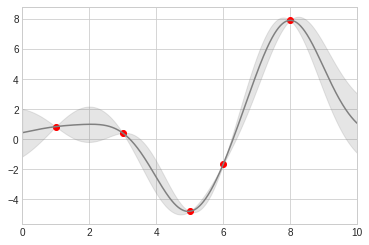

In [13]:
# 可视化结果
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

> Note what we've done here with the ``fill_between`` function: we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.

注意上面我们调用`fill_between`函数：我们传递了的参数包括x值，y值的低限，然后是y值的高限，结果是图表中介于低限和高限之间的区域会被填充。

> The resulting figure gives a very intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained and this is reflected in the small model errors.
In regions far from a measured data point, the model is not strongly constrained, and the model errors increase.

上图为我们提供了一个非常直观的高斯过程回归展示：在观测点的附近，模型会被限制在一个很小的区域内，反映了这些数据的误差比较小。在远离观测点的区域，模型开始发散，反映了这时的数据误差比较大。

> For more information on the options available in ``plt.fill_between()`` (and the closely related ``plt.fill()`` function), see the function docstring or the Matplotlib documentation.

如果需要获得`plt.fill_between`（以及类似的`plt.fill`函数）更多参数的信息，请查阅函数的帮助文档或Matplotlib在线文档。

> Finally, if this seems a bit too low level for your taste, refer to [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), where we discuss the Seaborn package, which has a more streamlined API for visualizing this type of continuous errorbar.

最后，如果你觉得本节的内容过于浅显，请参考[使用Seaborn进行可视化](04.14-Visualization-With-Seaborn.ipynb)，该小节会讨论Seaborn包，提供了将这种类型连续错误条进行可视化的流式API。

<!--NAVIGATION-->
< [简单的散点图](04.02-Simple-Scatter-Plots.ipynb) | [目录](Index.ipynb) | [密度和轮廓图](04.04-Density-and-Contour-Plots.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.03-Errorbars.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
